#### **Coding Samurai Internship Project  Task_2 - Retail Analytics for Rossmann Stores using Linear Regression**  
##### This project applies **Linear Regression**, using the historical sales dataset from Rossmann Stores to build a regression model that predicts daily sales. Linear Regression is suitable for this dataset because the target variable (Sales) is continuous. The workflow are as follows;

- ##### Data Collection  
- ##### Data Overview  
- ##### Feature Enginnering
- ##### Feature Exploration (EDA)
- ##### Data Preprocessing
- ##### Modelling
- ##### Prediction
- ##### Evaluation (R², RMSE, MAE).  
- ##### Insights

###### **Data Collection**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

In [3]:
import pandas as pd

df = pd.read_csv("/content/train.csv")

/tmp/ipython-input-3867463691.py:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/train.csv")


##### **Data Overview**

In [4]:
# Checking the first few rows and dataset infomation
print(df.head())
print(df.info())

   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 n

In [5]:
# Checking for missing values
df.isna().sum()

,0
Store,0
DayOfWeek,0
Date,0
Sales,0
Customers,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0


##### **Feature Engineering**

###### Date Extraction

In [6]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
# Extract year, month and day
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [8]:
df = df.drop(columns=['Date'])

###### Encoding

In [9]:
# Encoding
from feature_engine.encoding import OrdinalEncoder
oe = OrdinalEncoder(encoding_method='arbitrary', variables = ['StateHoliday'])
df = oe.fit_transform(df)

##### **Feature Exploration (EDA)**

In [10]:
# Summary Statistics
df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,5.605810e-01,1.786467e-01,2.013832e+03,5.846762e+00,1.570279e+01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,1.352747e+00,3.830564e-01,7.773960e-01,3.326097e+00,8.787638e+00
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.013000e+03,1.000000e+00,1.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.013000e+03,3.000000e+00,8.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.014000e+03,6.000000e+00,1.600000e+01
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.014000e+03,8.000000e+00,2.300000e+01
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,4.000000e+00,1.000000e+00,2.015000e+03,1.200000e+01,3.100000e+01


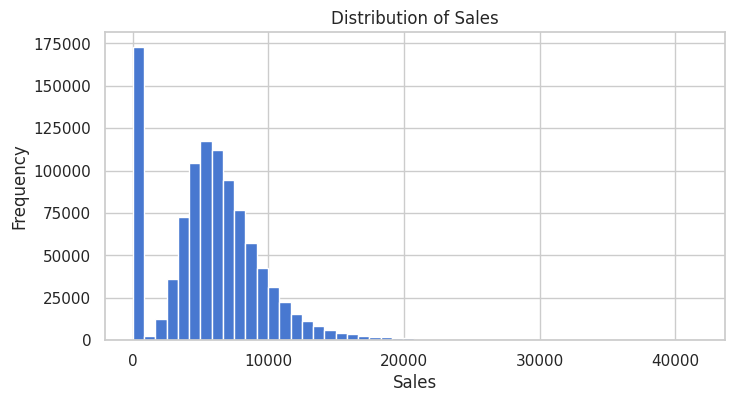

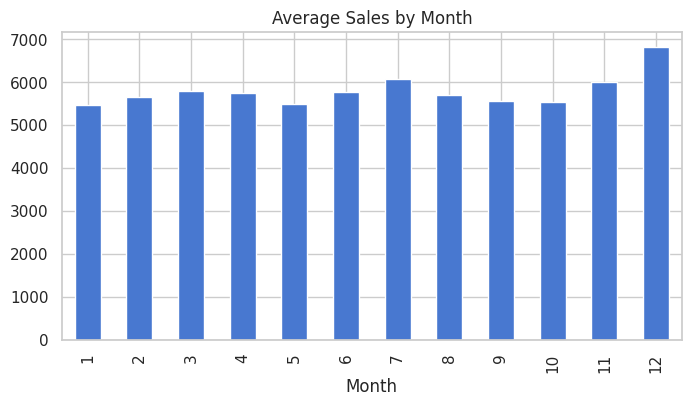

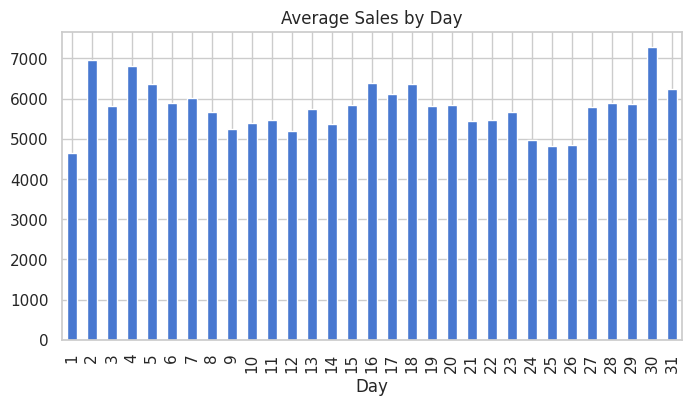

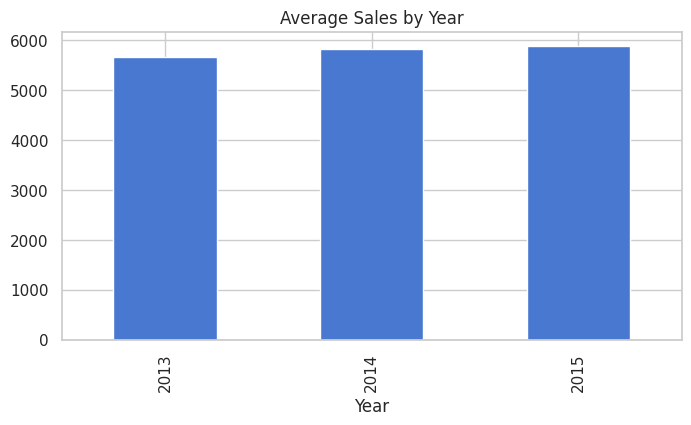

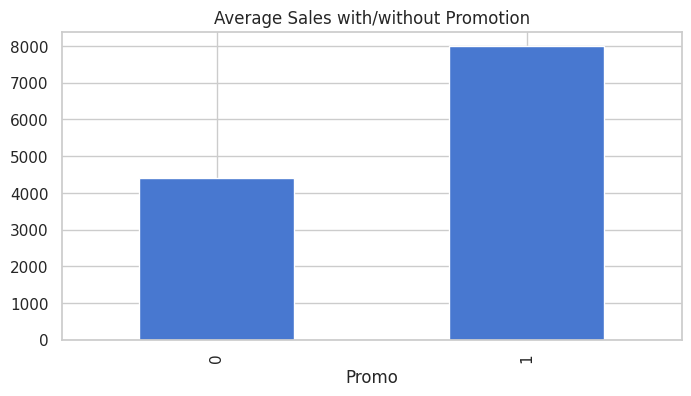

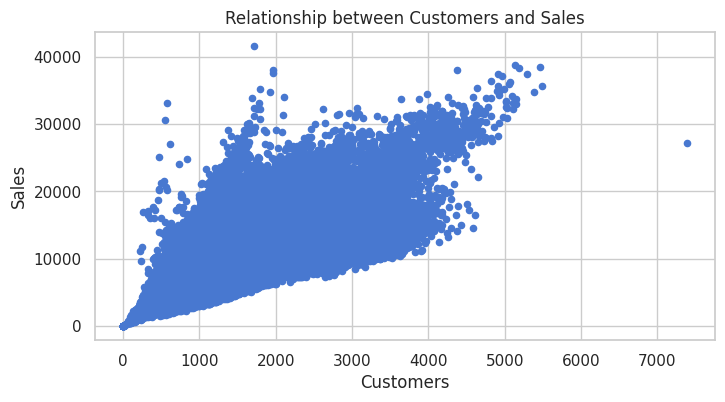

In [11]:
# Visualizations
# Aesthetics
sns.set(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (8,4)

# Sales Distribution
plt.hist(df['Sales'], bins=50)
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.title("Distribution of Sales")
plt.show()


# Sales Overtime
df.groupby('Month')['Sales'].mean().plot(kind='bar')
plt.title("Average Sales by Month")
plt.show()
df.groupby('Day')['Sales'].mean().plot(kind='bar')
plt.title("Average Sales by Day")
plt.show()
df.groupby('Year')['Sales'].mean().plot(kind='bar')
plt.title("Average Sales by Year")
plt.show()

# Effect of Promotions on Sales
df.groupby('Promo')['Sales'].mean().plot(kind='bar')
plt.title("Average Sales with/without Promotion")
plt.show()

# Relationship between customers and sales
df.plot(x='Customers', y='Sales', kind='scatter')
plt.title("Relationship between Customers and Sales")
plt.show()

###### Correlation

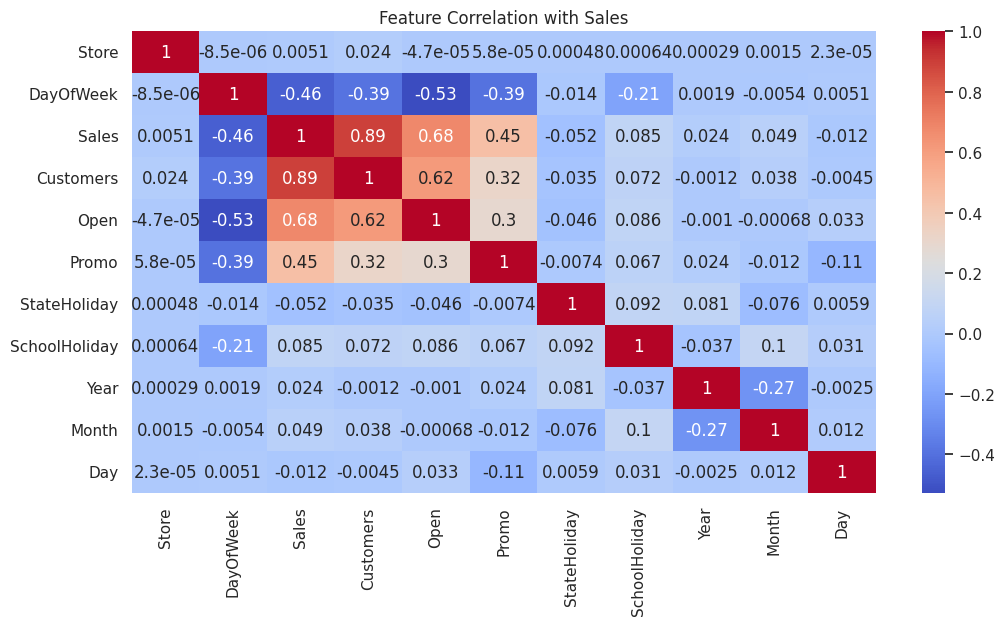

In [12]:
# Correlation Heatmap
corr = df.corr()
plt.figure(figsize=(12,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Feature Correlation with Sales")
plt.show()

###### **Data Preparation:** Feature Scaling, Selection and Spliting

In [13]:
# Feature Scaling
X = df.drop('Sales', axis=1)
y = df['Sales']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [14]:
# Feature Selection
from sklearn.feature_selection import SelectKBest, f_regression

# Applying Feature Selection
selector = SelectKBest(f_regression, k=7)
X_selected = selector.fit_transform(X, y)

print("Selected Features:")
print(X.columns[selector.get_support()])


Selected Features:
Index(['DayOfWeek', 'Customers', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'Month'],
      dtype='object')


In [15]:
# Data Spliting (80/20)
from sklearn.model_selection import train_test_split
X = df[['DayOfWeek', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'Month']]
y=df['Sales']

# Split into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (813767, 7)
Test shape: (203442, 7)


##### Data Preprocessing

In [16]:
from sklearn.preprocessing import PolynomialFeatures
pl = PolynomialFeatures(degree=3)
X_train = pl.fit_transform(X_train)
X_test =pl.transform(X_test)

##### **Modelling**

In [17]:
# Using Linear Regression model
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

##### **Prediction**

In [18]:
# Predicting sales on the test set
pred = LR.predict(X_test)

In [19]:
print(pred)

[7946.81820469 4961.4309278   158.12469934 ... 4332.7117553  5616.75667265
 6174.67108594]


###### **Evaluation**

In [20]:
# Evaluation of performance using Regression Metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

# Root Mean Squared Error
rmse = sqrt(mean_squared_error(pred, y_test))
print("RMSE:", rmse)

# Mean Absolute Error
mae = mean_absolute_error(y_test, pred)
print("MAE:", mae)

# R-squared
r2 = r2_score(y_test, pred)
print("R-squared:", r2)


RMSE: 1362.119756141509
MAE: 914.5884948458569
R-squared: 0.8747625697123397


###### **Insights**

#### **Insights**

- The **Linear Regression model with polynomial features (degree 3)** achieved strong performance:  
  - **RMSE:** 1362.12 → the model’s predictions are on average about 1,362 sales units away from the actual values.  
  - **MAE:** 914.59 → the average absolute error is under 1,000 sales units, which is acceptable considering the large sales values in retail.  
  - **R²:** 0.87 → the model explains **87% of the variance** in sales, showing that it captures most of the underlying sales patterns.  

- **Customer count** shows a very strong positive correlation with sales, confirming it as the most influential predictor.  

- **Promotions (Promo feature)** significantly increase average sales, highlighting their importance in driving revenue.  

- **Temporal features (Month, Day, Year)** reveal seasonality effects in sales, showing that consumer behavior is not uniform across time.  

- Despite good overall performance, **prediction errors remain** due to factors not included in the dataset (e.g., competition, regional events, holidays not captured, store-specific factors).  

- This model can serve as a **baseline for forecasting daily sales**, but incorporating more advanced methods (e.g., Random Forest, Gradient Boosting, or Time Series models like ARIMA/XGBoost Regressor) could further improve accuracy.